In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Data preparation

In [8]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

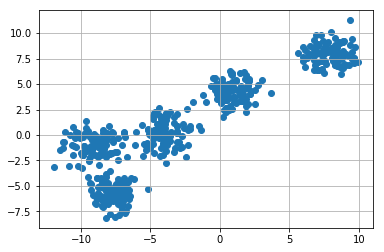

In [165]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
plt.show()

In [166]:
X.shape[1]

2

In [219]:
k=5
color=["green","red","blue","yellow","orange"]
clusters={}

for i in range(k):
    #a vector for center which should have 2 values
    x=np.random.randint(-10,10)
    y=np.random.randint(-7.5,10)
    center=np.array([x,y])
    
    points=[]
    
    cluster ={
       'center':center,
       'points':points,
       'color':color[i]
         }
    
    clusters[i]=cluster

In [220]:
clusters

{0: {'center': array([-3,  5]), 'points': [], 'color': 'green'},
 1: {'center': array([4, 5]), 'points': [], 'color': 'red'},
 2: {'center': array([5, 9]), 'points': [], 'color': 'blue'},
 3: {'center': array([ 7, -6]), 'points': [], 'color': 'yellow'},
 4: {'center': array([-6,  6]), 'points': [], 'color': 'orange'}}

# Step 2 : E step (assigning the points to nearest cluster center)

E step populates the points to nearest center

In [221]:
def distance(v1,v2):
    
    return np.sqrt(sum((v1-v2)**2))

In [222]:
def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):
    
        dist=[]
        curr_x = X[ix] 
        
        #to compute the dist of current point from all the data points
        for kx in range(k):
        
            #calculating the dist point from the center of the kth cluster
            d= distance(curr_x,clusters[kx]['center'])
        
            dist.append(d)
        
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x) 
    

# Step 3 - Update Cluster Centeroids(M step)

In M step we update the cluster center by taking the mean of all the prior assigned points
            distances and empty the list and go back to E step

In [236]:


def updateClusters(clusters):
    for kx in range(k):
        
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #if the cluster has some non-zero points then take the mean along the 0th axis
            
            new_u=np.mean(pts, axis = 0)
            clusters[kx]['center']=new_u
            
            #emptying the points list for new points
            clusters[kx]['points']=[]
        
    


def plot_cluster(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
            
        pts=np.array(clusters[kx]['points'])   
        
        #to plot the points 
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[kx]['color'])
        except:
            pass
            
        #the cluster center
        #print(pts)
        uk=clusters[kx]['center']
        print(pts.shape)
        plt.scatter(uk[0],uk[1],c='black',s=80,marker="*")
        #plt.grid(True)
        

(105, 2)
(100, 2)
(100, 2)
(0,)
(195, 2)


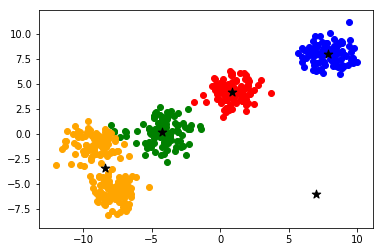

In [242]:
assignPointsToCluster(clusters, X)
plot_cluster(clusters)
updateClusters(clusters)

# Using sklearn

from sklearn.cluster import KMeans

In [29]:
kmeans= KMeans(n_clusters=5)

In [30]:
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
centers=kmeans.cluster_centers_

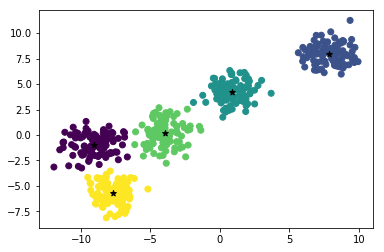

In [40]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.show()

In [38]:
pred=kmeans.labels_
print(pred)

[4 1 3 4 4 3 0 4 1 4 1 3 1 4 3 4 1 4 4 1 2 2 4 3 4 2 0 0 3 0 4 0 2 2 4 2 1
 1 4 2 2 2 0 0 3 1 1 0 0 0 1 4 0 4 4 2 4 4 1 3 1 3 3 4 0 1 3 3 2 3 2 4 2 4
 2 3 4 0 2 2 3 2 3 0 1 0 3 1 0 3 0 2 4 2 2 1 4 3 3 2 1 2 3 3 1 1 1 3 3 4 1
 0 4 1 3 2 1 0 2 3 1 3 0 4 2 0 0 0 4 4 3 3 4 1 1 0 3 0 3 4 4 2 3 1 0 4 1 1
 4 3 4 4 3 3 1 2 2 0 3 4 2 1 0 2 1 2 1 2 2 2 0 4 2 1 2 0 4 3 1 0 1 4 1 2 0
 0 2 4 3 1 2 3 0 4 0 2 3 0 4 4 4 2 2 1 4 0 0 4 1 4 4 4 2 1 3 1 4 4 1 0 3 0
 0 2 4 3 4 3 0 2 3 3 4 2 4 2 3 1 3 2 2 1 4 4 3 3 2 1 2 4 0 1 0 4 0 0 0 0 1
 2 1 4 2 1 0 3 1 1 1 0 4 4 3 2 2 1 3 3 4 3 0 3 1 1 0 0 2 0 0 1 2 4 3 2 3 0
 3 3 1 4 2 1 2 2 4 0 2 3 2 0 4 4 3 1 2 0 1 2 3 0 1 0 4 2 0 3 3 2 2 2 4 0 2
 4 1 3 3 0 1 1 3 3 0 2 2 2 4 0 1 0 4 2 1 1 3 2 2 0 2 0 3 3 3 0 2 4 2 3 0 0
 1 4 1 0 4 0 3 1 2 1 3 4 4 1 1 2 1 2 0 3 1 0 4 4 1 3 2 0 4 4 4 0 1 2 1 1 1
 0 2 3 1 3 3 0 3 4 3 4 1 2 2 4 1 0 4 2 3 1 0 3 0 0 1 0 3 0 1 0 3 0 4 2 2 0
 2 1 2 2 0 4 4 3 0 2 3 0 3 1 3 1 4 2 3 4 3 4 4 2 4 2 0 1 1 3 4 4 0 0 1 0 0
 1 0 1 1 1 0 2 0 3 1 3 3 